In [1]:
import numpy as np
import h5py
import plotly.offline as offline       # a number of plotly goodies
import plotly.plotly as py
import plotly.graph_objs as go


from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import h5py

In [2]:
file_discr = 'data/Al_BSE_DS_short.h5'

df_discr = pd.read_hdf(file_discr, 'all_electrons')

print 'mean total length travelled by BSE', np.mean(df_discr[df_discr.values=='backscattered']['TP'])
print 'mean free path travelled by BSE', np.mean(df_discr[df_discr.values=='backscattered']['MFP'])
print 'mean number of scattering events suffered by BSE', np.mean(df_discr[df_discr.values=='backscattered']['num_scatt'])


en_discr = df_discr[df_discr.values=='backscattered']['energy'].values.tolist()

mean total length travelled by BSE 13305.474459407036
mean free path travelled by BSE 182.50904895627514
mean number of scattering events suffered by BSE 72.95346385542169


In [3]:
file_cont = 'data/Al_BSE_cont_short.h5'

df_cont = pd.read_hdf(file_cont, 'all_electrons')

print 'mean total length travelled by BSE', np.mean(df_cont[df_cont.values=='backscattered']['TP'])
print 'mean free path travelled by BSE', np.mean(df_cont[df_cont.values=='backscattered']['MFP'])
print 'mean number of scattering events suffered by BSE', np.mean(df_cont[df_cont.values=='backscattered']['num_scatt'])


en_cont = df_cont[df_cont.values=='backscattered']['energy'].values.tolist()

mean total length travelled by BSE 13087.050516317746
mean free path travelled by BSE 308.1838457373046
mean number of scattering events suffered by BSE 42.26120914087359


#### BSE spectra

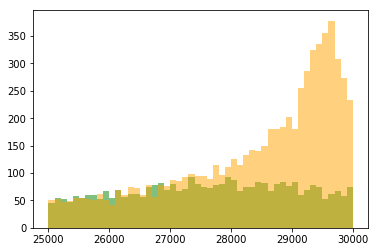

In [34]:
num_bins = 50
n_cont, bins_cont, patches_cont = plt.hist(en_cont, num_bins, facecolor='green', alpha=0.5)
bins_mean = [0.5 * (bins_cont[i] + bins_cont[i+1]) for i in range(len(n_cont))]

trace_cont = go.Scatter(x = bins_mean, 
                          y = n_cont, 
                          marker=dict(
                               color = 'rgba(127, 201, 127, .9)',),
                          name = 'continuous',)


############
n_discr, bins_discr, patches_discr = plt.hist(en_discr, num_bins, facecolor='orange', alpha=0.5)

trace_discr = go.Scatter(x = bins_mean, 
                          y = n_discr, 
                          marker=dict(
                               color = 'rgba(253, 192, 134, .9)',),
                          name = 'discrete',)



layout_log = go.Layout(
        title = '10 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'BSE counts per 100 eV bin (#/100 eV)', 
             zerolinecolor='#969696', 
             #range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             range=[25000, 30000])
    )


datatrace = [trace_cont, trace_discr ]
fig = go.Figure(data=datatrace, layout=layout_log)
py.iplot(fig, filename = 'Al BSE per 100eV at 70 tilt')

#### Total pathlength per energy bin

In [60]:
def pairs(lst):
    '''for a non empty list return a tuples of pair items'''
    i = iter(lst)
    first = prev = item = i.next()
    for item in i:
        yield prev, item
        prev = item
    yield item, first
    
BSE_discr = df_discr[df_discr.values=='backscattered']   

total_path = np.zeros(len(bins_cont-1))
count = np.zeros(len(bins_cont-1))
num_scatt = np.zeros(len(bins_cont-1))
for  bin_number, bin_edges in enumerate(pairs(bins_cont)):    
    BSE_discr.loc[((BSE_discr['energy'] >= bin_edges[0]) & (BSE_discr['energy']< bin_edges[1])), 'energy_bin'] = bin_number
    if ((BSE_discr.loc[(BSE_discr['energy_bin'] == bin_number), 'TP'].values).any()):
        total_path[bin_number] = np.mean((BSE_discr.loc[(BSE_discr['energy_bin'] == bin_number), 'TP'].values))
        count[bin_number] = len((BSE_discr.loc[(BSE_discr['energy_bin'] == bin_number), 'TP'].values))
        num_scatt[bin_number] = np.mean((BSE_discr.loc[(BSE_discr['energy_bin'] == bin_number), 'num_scatt'].values))

t_discr_m = go.Scatter(x = bins_cont, 
                          y = total_path, 
                          marker=dict(
                          color = 'rgba(127, 201, 127, .9)',),
                          name = 'discrete',)
print 'mean discrete TP', np.sum(total_path*count)/(np.sum(count))

trace_discr_count = go.Scatter(x = bins_cont, 
                          y = num_scatt, 
                          marker=dict(
                          color = 'rgba(127, 201, 127, .9)',),
                          name = 'discrete',)

#############     
BSE_cont = df_cont[df_cont.values=='backscattered']   

total_path = np.zeros(len(bins_cont-1))
count = np.zeros(len(bins_cont-1))
num_scatt = np.zeros(len(bins_cont-1))
for  bin_number, bin_edges in enumerate(pairs(bins_cont)):    
    BSE_cont.loc[((BSE_cont['energy'] >= bin_edges[0]) & (BSE_cont['energy']< bin_edges[1])), 'energy_bin'] = bin_number
    if ((BSE_cont.loc[(BSE_cont['energy_bin'] == bin_number), 'TP'].values).any()):
        total_path[bin_number] = np.mean((BSE_cont.loc[(BSE_cont['energy_bin'] == bin_number), 'TP'].values))
        count[bin_number] = len((BSE_cont.loc[(BSE_cont['energy_bin'] == bin_number), 'TP'].values))
        num_scatt[bin_number] = np.mean((BSE_cont.loc[(BSE_cont['energy_bin'] == bin_number), 'num_scatt'].values))

t_cont_m = go.Scatter(x = bins_cont, 
                          y = total_path, 
                          marker=dict(
                          color = 'rgba(253, 192, 134, .9)'),
                          name = 'continuous',) 

trace_cont_count = go.Scatter(x = bins_cont, 
                          y = num_scatt, 
                          marker=dict(
                          color = 'rgba(253, 192, 134, .9)'),
                          name = 'continuous',)

layout = go.Layout(
        title = '10 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'Mean total pathlenght counts per 100 eV bin (#/100 eV)', 
             zerolinecolor='#969696', 
             #range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             range=[25000, 30000])
    )
print 'mean continous TP', np.sum(total_path*count)/(np.sum(count)) 
datatrace = [t_cont_m, t_discr_m ]
fig = go.Figure(data=datatrace, layout=layout)
py.iplot(fig, filename = 'mean total pathlength Al BSE per 100eV at 70 tilt')




mean discrete TP 13388.08279931503
mean continous TP 13090.75922899806


#### All total path lengths

In [51]:
energy = BSE_discr['energy']
trace_discr = go.Scatter(x = energy, 
                         y = BSE_discr['TP'], 
                         mode = 'markers',
                         marker=dict(
                         size = 2,    
                         color = 'rgba(127, 201, 127, .9)',),
                         name = 'discrete',)




energy = BSE_cont['energy']
trace_cont = go.Scatter(x = energy, 
                        y = BSE_cont['TP'], 
                        mode = 'markers',
                        marker=dict(
                        size = 2,    
                        color = 'rgba(253, 192, 134, .9)'),
                        name = 'continuous',)  


 

layout = go.Layout(
        title = '10 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'Total pathlenght per electron', 
             zerolinecolor='#969696', 
             #range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             range=[25000, 30000])
    )

datatrace = [trace_cont, trace_discr, t_cont_m, t_discr_m ]
fig = go.Figure(data=datatrace, layout=layout)
py.iplot(fig, filename = 'all total pathlength Al BSE at 70 tilt')


#### scattering counts per energy bin

In [61]:
energy = BSE_discr['energy']
t_discr = go.Scatter(x = energy, 
                         y = BSE_discr['num_scatt'], 
                         mode = 'markers',
                         marker=dict(
                         size = 2,    
                         color = 'rgba(127, 201, 127, .9)',),
                         name = 'discrete',)




energy = BSE_cont['energy']
t_cont = go.Scatter(x = energy, 
                        y = BSE_cont['num_scatt'], 
                        mode = 'markers',
                        marker=dict(
                        size = 2,    
                        color = 'rgba(253, 192, 134, .9)'),
                        name = 'continuous',)  



layout = go.Layout(
        title = '10 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = '# scaterings per energy bin', 
             zerolinecolor='#969696', 
             #range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             range=[25000, 30000])
    )

datatrace = [trace_cont_count, trace_discr_count, t_discr, t_cont ]
fig = go.Figure(data=datatrace, layout=layout)
py.iplot(fig, filename = 'all total pathlength Al BSE at 70 tilt')

In [54]:

energy = BSE_discr['energy']
trace_discr_MFP = go.Scatter(x = energy, 
                        y = BSE_discr['MFP'], 
                        mode = 'markers',
                        marker=dict(
                        size = 2,    
                        color = 'rgba(127, 201, 127, .9)'),
                        name = 'discrete',)  

energy = BSE_cont['energy']
trace_cont_MFP = go.Scatter(x = energy, 
                        y = BSE_cont['MFP'], 
                        mode = 'markers',
                        marker=dict(
                        size = 2,    
                        color = 'rgba(253, 192, 134, .9)'),
                        name = 'continuous',)  
layout = go.Layout(
        title = '10 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'MFP per electron', 
             zerolinecolor='#969696', 
             #range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             range=[25000, 30000])
    )
datatrace = [trace_cont_MFP, trace_discr_MFP ]
fig = go.Figure(data=datatrace, layout=layout)
py.iplot(fig, filename = 'MFP Al BSE at 70 tilt')

In [55]:

energy = BSE_discr['energy']
trace_discr_MFP = go.Scatter(x = energy, 
                        y = BSE_discr['num_scatt'], 
                        mode = 'markers',
                        marker=dict(
                        size = 2,    
                        color = 'rgba(127, 201, 127, .9)'),
                        name = 'discrete times',)  

energy = BSE_cont['energy']
trace_cont_MFP = go.Scatter(x = energy, 
                        y = BSE_cont['num_scatt'], 
                        mode = 'markers',
                        marker=dict(
                        size = 2,    
                        color = 'rgba(253, 192, 134, .9)'),
                        name = 'continuous times',)  
layout = go.Layout(
        title = '10 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'number of scatterings per electron', 
             zerolinecolor='#969696', 
             #range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             range=[25000, 30000])
    )
datatrace = [trace_cont_MFP, trace_discr_MFP ]
fig = go.Figure(data=datatrace, layout=layout)
py.iplot(fig, filename = 'num scatt Al BSE at 70 tilt')